In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.optimize import root_scalar

In [2]:
def E_0(s):
  return 26 if s < 0.4 else 44 - 17 * (s - 1.46)**2
  
def T(E, s):
  return ((0.89*E_0(s) - 1.2)/(E_0(s) + E))**s * (1 + 10**(-4) * s * E)**(-2)

def F(x, s):
  return ((0.89*E_0(s) - 1.2)/(E_0(s) + 10**x))**s * (1 + 10**(-4) * s * 10**x)**(-2)

def FDer(x, s):
  return F(x, s) * -s * ((E_0(s) + 10**x)**(-1) + 2e-4 * (1 + 1e-4 * s * 10**x)**(-1))

In [44]:
class randgen():
    def __init__(self, s, un_normalized_pdf, a=1, b=5):
        A = 1/integrate.quad(lambda x: un_normalized_pdf(x, s), 1, 100)[0]
        self.norm = A
        self.cdf_cache = {1: 0}  # Store testcdf(1) = 0 initially
        self.HASH_RANGE = 10000000

        xs = np.linspace(a, b, self.HASH_RANGE)
        self.pdf_vals = A*un_normalized_pdf(xs, s)
        self.cdf_vals = integrate.cumulative_trapezoid(self.pdf_vals, xs, initial=0)

    # turns x into index
    def hashmap(self, x, HASH_RANGE):
        return np.asarray( (x-1)/(5-1) * (HASH_RANGE-1) + 1 , dtype="int")

    # turns index into x
    def reverse_hashmap(self, index, HASH_RANGE):
        return (index-1)*(5-1) / (HASH_RANGE-1) + 1

    def cdf(self, x):
        return self.cdf_vals[self.hashmap(x, self.HASH_RANGE)-1]

    def generate(self, num=1):
        res = []
        r_vals = np.random.rand(num)
        for r in r_vals:
            res.append(root_scalar(lambda x: self.cdf(x) - r, method='brentq', bracket=[1, 5], x0=2, xtol=1.49012e-08).root)
        return res

In [45]:
rg = randgen(s=1.2, un_normalized_pdf=FDer)

In [49]:
vals = rg.generate(100000)

In [ ]:
HASH_RANGE = 10000000
A = 1/integrate.quad(lambda x: FDer(x, 1.2), 1, 100)[0]

cdf_cache = {1: 0}  # Store testcdf(1) = 0 initially

# turns x into index
def hashmap(x):
    return np.asarray( (x-1)/(5-1) * (HASH_RANGE-1) + 1 , dtype="int")

# turns index into x
def reverse_hashmap(x):
    return (x-1)*(5-1) / (HASH_RANGE-1) + 1

x = np.linspace(1, 5, HASH_RANGE)
pdf = A*FDer(x, 1.2)

cdf_vals = integrate.cumulative_trapezoid(pdf, x, initial=0)
def cdf_func(x):
    return cdf_vals[hashmap(x)-1]


In [ ]:
def randGen(num=1):
  res = []
  r_vals = np.random.rand(num)
  for r in r_vals:
    res.append(root_scalar(lambda x: cdf_func(x) - r, method='brentq', bracket=[1, 4], x0=2, xtol=1.49012e-08).root)

  return res

In [33]:
vals = randGen(100000)

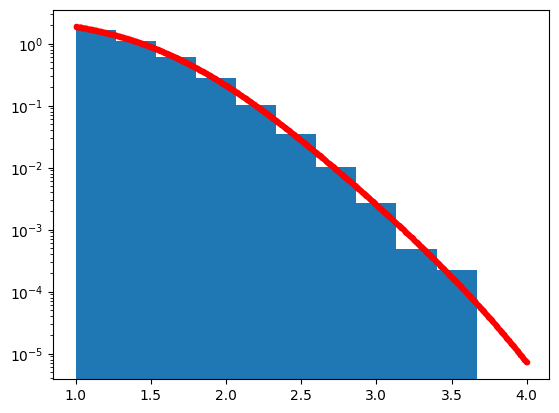

In [35]:
plt.hist(vals, density=True)
esl = np.linspace(1, 4, 800)
plt.plot(esl, A*FDer(esl, 1.2), 'r.')
plt.yscale('log')